In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-behavior-dataset/Customer_Behavior_Data.csv


In [7]:
dataset=pd.read_csv("/kaggle/input/customer-behavior-dataset/Customer_Behavior_Data.csv")

In [8]:
X=dataset.drop('customer_id',axis=1)

In [9]:
scaler_cust_beh=StandardScaler()

In [10]:
X_scaled=scaler_cust_beh.fit_transform(X)

In [11]:
pd.DataFrame(X_scaled,columns=X.columns)

,Total Orders,Total Order Days,Average Orders Placed,Total Order Value,Average Order Value,Average Order Gap Days,Order Consistency Score
0,4.180930,3.959272,0.924194,1.562106,-0.230621,-0.604448,-0.048969
1,-0.068885,-0.117909,0.838915,-0.339649,-0.422895,-0.554931,-0.049072
2,-0.346047,-0.326996,-0.440267,0.353666,1.016869,-0.336934,-0.049093
3,9.955136,6.677393,4.370180,2.116761,-0.352869,-0.619624,-0.048899
4,1.686473,1.816138,0.029636,-0.262082,-0.475000,-0.594937,-0.049012
...,...,...,...,...,...,...,...
4156,-0.669403,-0.692897,-0.440267,-0.352482,0.719401,2.402186,-0.049113
4157,-0.669403,-0.692897,-0.440267,-0.417814,-0.307505,2.402186,-0.049113
4158,-0.669403,-0.692897,-0.440267,-0.400468,-0.034854,2.402186,-0.049113
4159,-0.669403,-0.692897,-0.440267,-0.427193,-0.454933,2.402186,-0.049113


In [12]:
def piechart(series):
    """
    Automatically plots a pie chart from a Pandas Series.
    - Uses the series name as the chart title.
    - Displays value counts as percentages.
    """
    if not isinstance(series, pd.Series):
        raise TypeError("Input must be a pandas Series")

    counts = series.value_counts(dropna=False)
    labels = counts.index.astype(str)
    
    # Auto-title using series name or fallback
    title = series.name if series.name else "Pie Chart"

    # Plot
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
    plt.show()

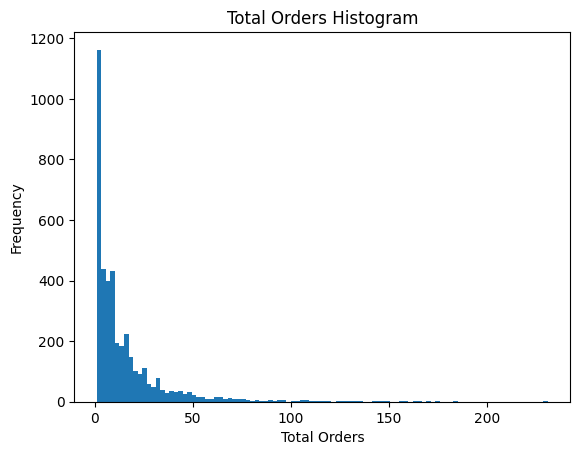

In [13]:
plt.hist(X['Total Orders'],bins=100)
plt.title('Total Orders Histogram')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()

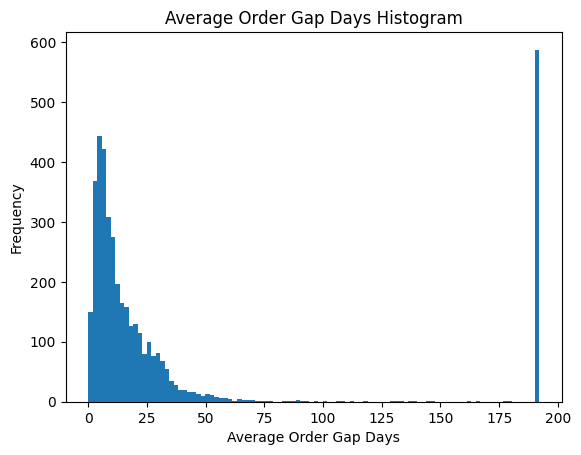

In [14]:
plt.hist(X['Average Order Gap Days'],bins=100)
plt.title('Average Order Gap Days Histogram')
plt.xlabel('Average Order Gap Days')
plt.ylabel('Frequency')
plt.show()

In [15]:
X.corr()

,Total Orders,Total Order Days,Average Orders Placed,Total Order Value,Average Order Value,Average Order Gap Days,Order Consistency Score
Total Orders,1.000000,0.991946,0.222749,0.384955,-0.063128,-0.349762,-0.028296
Total Order Days,0.991946,1.000000,0.167604,0.358644,-0.071589,-0.359465,-0.029365
Average Orders Placed,0.222749,0.167604,1.000000,0.222060,0.076948,-0.229658,0.053742
Total Order Value,0.384955,0.358644,0.222060,1.000000,0.499125,-0.195550,-0.015171
Average Order Value,-0.063128,-0.071589,0.076948,0.499125,1.000000,0.028508,0.005666
Average Order Gap Days,-0.349762,-0.359465,-0.229658,-0.195550,0.028508,1.000000,-0.018891
Order Consistency Score,-0.028296,-0.029365,0.053742,-0.015171,0.005666,-0.018891,1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


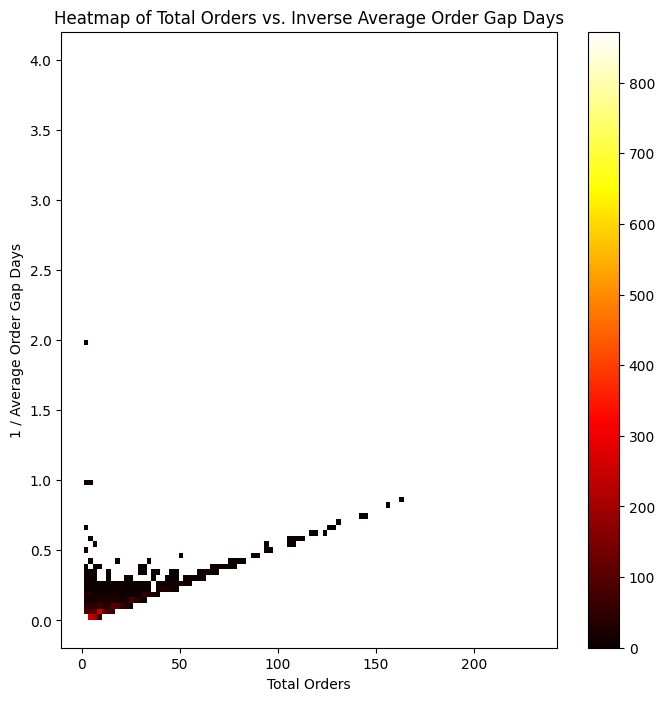

In [16]:
df = pd.DataFrame({
    'Total Orders': X['Total Orders'],
    'Inv Avg Order Gap': X['Average Order Gap Days']**(-1)
})

plt.figure(figsize=(8, 8))
sns.histplot(
    data=df,
    x='Total Orders',
    y='Inv Avg Order Gap',
    bins=100,         # Adjust bins as needed
    pthresh=0.000000000000000000000000000000000000000000000001,     # Lower if you want to see sparser regions
    cmap='hot',  # Or any other colormap you like
    cbar=True
)
plt.xlabel('Total Orders')
plt.ylabel('1 / Average Order Gap Days')
plt.title('Heatmap of Total Orders vs. Inverse Average Order Gap Days')
plt.show()

In [17]:
cluster1_data=dataset[X['Total Orders']<=4]['customer_id']

In [18]:
cluster2_data=dataset[((X['Total Orders']<=25) & (X['Total Orders']>4) & (X['Average Order Gap Days']>=14))]['customer_id']

In [19]:
cluster1_data

7       3310
46      9086
69      9324
70      8288
71      8807
        ... 
4156    1222
4157    7309
4158    7840
4159    2486
4160    7851
Name: customer_id, Length: 1382, dtype: int64

In [20]:
cluster2_data

2       3827
12      2528
22      4308
37      6080
40      1533
        ... 
3825    3274
3903    1800
3943    4729
3954    5566
3967     810
Name: customer_id, Length: 847, dtype: int64

In [21]:
dataset.shape

(4161, 8)